In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt


SMALL_SIZE  = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [54]:
SERIES_TOTAL = 'Emissions (thousand metric tons of carbon dioxide)'
SERIES_PER_CAPITA = 'Emissions per capita (metric tons of carbon dioxide)'
FIG_SIZE_2 = (20, 6)


In [55]:
def column_properties(df):
    columns_prop = pd.DataFrame()
    columns_prop['column'] = df.columns.tolist()
    columns_prop['count_non_null'] = df.count().values
    columns_prop['count_null'] = df.isnull().sum().values
    columns_prop['perc_null'] = columns_prop['count_null'] * 100 / df.shape[0]

    #using df.nunique() is memory intensive and slow resulting in kernal death
    unique_list = []
    for col in df.columns.tolist():
        unique_list.append(df[col].value_counts().shape[0])
    columns_prop['count_unique'] =  unique_list
    
    columns_prop['dtype'] = df.dtypes.values
    columns_prop.set_index('column', inplace = True)
    return columns_prop

## Read Emission Data

In [56]:

file_name_emission = 'CO2_emission_estimates.csv'
# emission_data = pd.read_csv(file_name_emission)
emission_data = pd.read_csv(file_name_emission, encoding = 'unicode_escape', engine ='python')

emission_data.shape

(2180, 5)

In [57]:
file_name_econ_dev = 'economic_devlopment.csv'
# econ_dev_data = pd.read_csv(file_name_econ_dev)
econ_dev_data = pd.read_csv(file_name_econ_dev,encoding = 'unicode_escape', engine ='python')
columns = ['Economy', 'Country'	]
econ_dev_data = econ_dev_data[columns]



#### Merge the country develpment satus with main data

In [58]:
data = pd.merge( emission_data, econ_dev_data, on = 'Country', how = 'left')
data.head()

,Region,Country,Year,Series,Value,Economy
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.0,Developing
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6930.0,Developing
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.0,Developing
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.0,Developing
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3825.0,Developing


In [59]:
column_properties(data)

,count_non_null,count_null,perc_null,count_unique,dtype
column,,,,,
Region,2180,0,0.000000,144,int64
Country,2180,0,0.000000,144,object
Year,2180,0,0.000000,8,int64
Series,2180,0,0.000000,2,object
Value,2180,0,0.000000,1267,float64
Economy,2164,16,0.733945,2,object


In [60]:
def get_agg_data_by_year(data):
    agg = { 'Total_Emission': pd.NamedAgg(column= 'Value', aggfunc = 'sum'),
            'Avg_Emission':   pd.NamedAgg(column= 'Value', aggfunc = np.mean) }

    emission_agg_by_year =  data.groupby(['Year', 'Series']).agg(**agg).reset_index() 
    emission_agg_by_year['Year'] = emission_agg_by_year['Year'].apply(str)
    return emission_agg_by_year


In [61]:


def plot_total_emiision_by_year(emission_agg_by_year):
    emission_total     = emission_agg_by_year[emission_agg_by_year.Series== SERIES_TOTAL].copy()
    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total['Total_Emission'] = (emission_total['Total_Emission'] * 1000) / 1000000


    emission_percapita = emission_agg_by_year[emission_agg_by_year.Series== SERIES_PER_CAPITA]



    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = FIG_SIZE_2)
    s = sns.barplot(ax = ax1, x = 'Year'	, y = "Total_Emission", data = emission_total)
    s.set_title('Total Emissions By Year')
    s.set(ylabel = 'Total Emission (Millions MT of CO2 )')

    s = sns.barplot(ax = ax2, x = 'Year'	, y = "Total_Emission", data = emission_percapita)
    s.set_title('Total Emissions Per Capita By Year')
    s.set(ylabel = 'Total Emission Per Capita (MT of CO2 )')
    plt.show()



### Plot Total Emission By Year for all Countries

<br> The Total emissions for all countries show increasing trend from year 1985 to 2005.  The Total emission can be seen stablizing after 2005
<br> The per capita emissions on the other hand shows decreasing trend after 2005 which is a good sign.


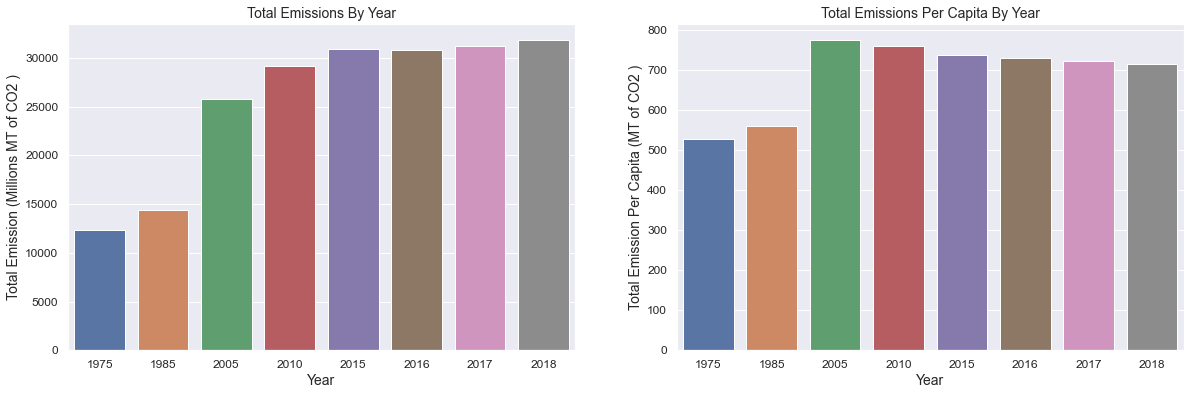

In [62]:
emission_agg_by_year =   get_agg_data_by_year(data)
plot_total_emiision_by_year(emission_agg_by_year)

In [63]:

def plot_average_emission_by_year(emission_agg_by_year):
    emission_total     = emission_agg_by_year[emission_agg_by_year.Series== SERIES_TOTAL].copy()
    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total['Avg_Emission'] = (emission_total['Avg_Emission'] * 1000) / 1000000

    emission_percapita = emission_agg_by_year[emission_agg_by_year.Series== SERIES_PER_CAPITA]

    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = FIG_SIZE_2)
    s = sns.barplot(ax = ax1, x = 'Year'	, y = "Avg_Emission", data = emission_total)
    s.set_title('Average Emissions By Year')
    s.set(ylabel = 'Average Emission (Million MT of CO2 )')

    s = sns.barplot(ax = ax2, x = 'Year'	, y = "Avg_Emission", data = emission_percapita)
    s.set_title('Average Emissions Per Capita By Year')
    s.set(ylabel = 'Average Emission Per Capita (MT of CO2 )')
    plt.show()

### Plot Average Emission By Year per country
<br>The avergae emission per country has also stablized after 2005 with value around 200 Million MT of CO2.
<br> Similarly per capita emission per country on avergae is stablized around 5MT for recent years



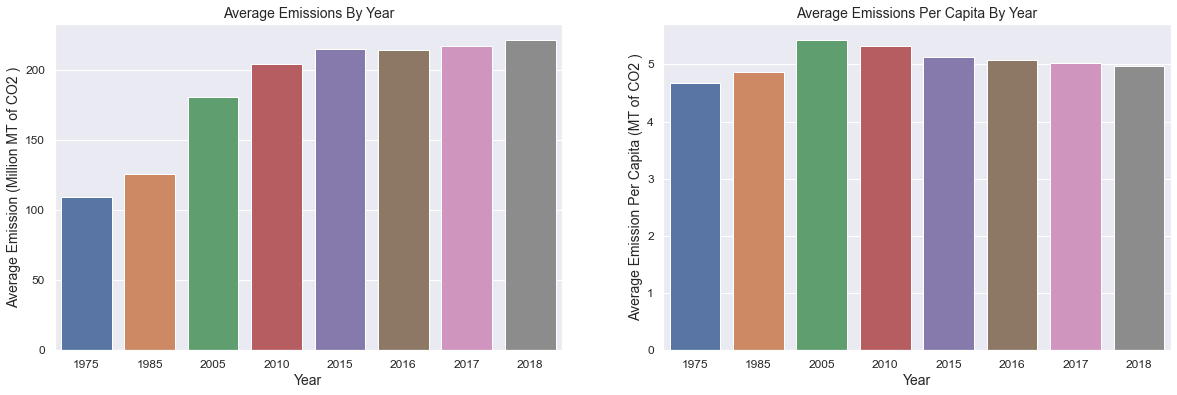

In [64]:
plot_average_emission_by_year(emission_agg_by_year)

## Plot Emission By Economic Development

In [65]:
agg = { 'Total_Emission': pd.NamedAgg(column= 'Value', aggfunc = 'sum'),
         'Avg_Emission':  pd.NamedAgg(column= 'Value', aggfunc = np.mean) }

emission_agg_by_econ =  data.groupby(['Economy', 'Series']).agg(**agg).reset_index() 
# emission_agg_by_econ['Year'] = emission_agg_by_year['Year'].apply(str)
emission_agg_by_econ

,Economy,Series,Total_Emission,Avg_Emission
0,Developed,Emissions (thousand metric tons of carbon diox...,96555782.0,266728.679558
1,Developed,Emissions per capita (metric tons of carbon di...,3098.4,8.559116
2,Developing,Emissions (thousand metric tons of carbon diox...,109852625.0,152573.090278
3,Developing,Emissions per capita (metric tons of carbon di...,2431.0,3.376389


In [66]:
data

,Region,Country,Year,Series,Value,Economy
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.0,Developing
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6930.0,Developing
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.0,Developing
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.0,Developing
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3825.0,Developing
...,...,...,...,...,...,...
2175,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,Developing
2176,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.9,Developing
2177,716,Zimbabwe,2016,Emissions per capita (metric tons of carbon di...,0.7,Developing
2178,716,Zimbabwe,2017,Emissions per capita (metric tons of carbon di...,0.7,Developing
